# Project: Investigate TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>

<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 ### The Research Questions
 1- Is the rating of movies getting better or worse or staying the same over time ? <br>
 2- Is the film industry making profit over years?<br>
 3- what is the relation between number of movies and years?<br>
 4- Are movies getting longer over years ?



In [149]:
# Import all the packages we need in this project

import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime


<a id='wrangling'></a>
## Data Wrangling

Reading TMDb Movies Dataset.

In [240]:
# load data
df = pd.read_csv("C:\\Users\\-\\Downloads\\tmdb-movies.csv")

Print the first rows to read and understand the data.

In [241]:
# Print the first 5 rows in the file
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Displays a concise summary of the dataframe,including the number of non-null values in each column.

In [242]:
# Print summary of TMDb file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

1- Drop some columns that we will not use or need.
<br>
2- Drop the duplicacy if there is.
<br>
3- The type of the **release_date** column is string, we need to change it to datetime.
<br>
4- Drop the null or 0 values from the data.
<br>

In [243]:
# Deleting (id,imdb_id,cast,homepage,tagline,keywords,overview) columns
to_drop = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]
df.drop(to_drop, inplace=True, axis=1)

In [244]:
# Check for duplicates in the data
sum(df.duplicated())

1

In [245]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [246]:
# Check again for duplicates 
sum(df.duplicated())

0

In [247]:
# Convert 'release_date' type from str to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [248]:
# Replace all values of 0 with NAN
df = df.replace(0, np.nan)

In [249]:
# Droping the null
df = df.dropna()

In [250]:
# Confirm correction 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null float64
revenue                 3807 non-null float64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 446.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis
Now we have clean data we can work with, We will start exploring the TMDb dataset by making questions and answer them.  

### Research Question 1
#### Is the rating of movies getting better or worse or staying the same over time ?

We will work with two variables, The independent varible is the time in **release_year** column and the dependent varible<br> is the movie rating in **vote_average** column.<br>
We need to `groupby()` the table by **release_year** and calculate the `mean()` of **vote_average** for each year.

First we define a function to calculate the mean of one column then groupby the result by another column, We will use this function in **Q1** & **Q2**.

In [251]:
# definding a function to calculate the mean for column2 and groupby by column1
def groupby_avg(column1,column2):
    avg_gb_data = df.groupby(column1)[column2].mean()
    return avg_gb_data

Now we want visualize the result to make conclusion.

Text(0, 0.5, 'Average Rating')

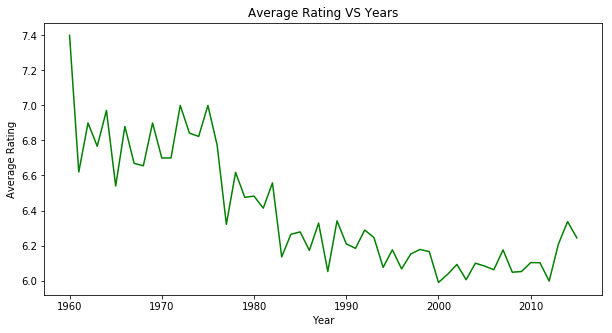

In [252]:
# call the groupby_avg function and passing release_year and vote_average arguments
avg_rating_year = groupby_avg("release_year","vote_average")

# plot relationship between release_year and vote_average
avg_rating_year.plot(kind='line',color='green',title='Average Rating VS Years',figsize = (10,5))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Average Rating')

### Conclusion 

The ratings **decrease** over years.<br>
From the plot old movies had a better ratings than the new one. <br><br>
It makes us think is the movie industry dying?


### Research Question 2 

#### Is the film industry making profit over years?

We will work with two variables, The independent varible is the time in **release_year** column and the dependent varible is the movie rating in **profit** column.

We need first to calculate the profit by subtracting **budget** column from **revenue** column. And adding a new column with the name **profit** by `inset()`.

In [253]:
# Adding a new column from substract two columns and put it first one
df.insert(1,"profit",df["revenue"] - df["budget"])
df.head()

,popularity,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


We need to `groupby()` the table by **release_year** and calculate the `mean()` of **profit** for each year. we will use the `groupby_avg` function. 

Now we want visualize the result to make conclusion.

Text(0, 0.5, 'Profit')

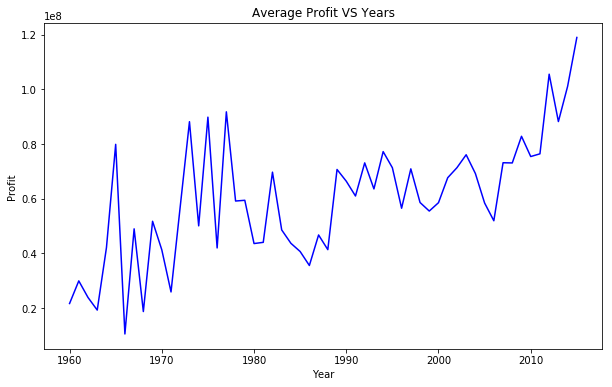

In [254]:
#call the groupby_avg function and passing release_year and profit arguments
avg_profit_year = groupby_avg("release_year","profit")

# plot relationship between release_year and profit
avg_profit_year.plot(kind='line',color='blue',title='Average Profit VS Years',figsize = (10,6))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Profit')

### Conclusion 

The profit **increase** over years.<br>
From plot the film industry making profit over time, The film industry is a profit industry.<br><br>

It seems the film industry not dying after all just bad production!


### Research Question 3

#### What is the relation between number of movies and years?

We will work with two variables, The independent varible is the time in **release_year** column and the dependent varible is the **number of movies**.

First we need to calculate the number of movies in each year by `value_counts()` **release_years** column, and sort the years by `sort_index()`.

Now we want visualize the result to make conclusion.

Text(0, 0.5, 'Year')

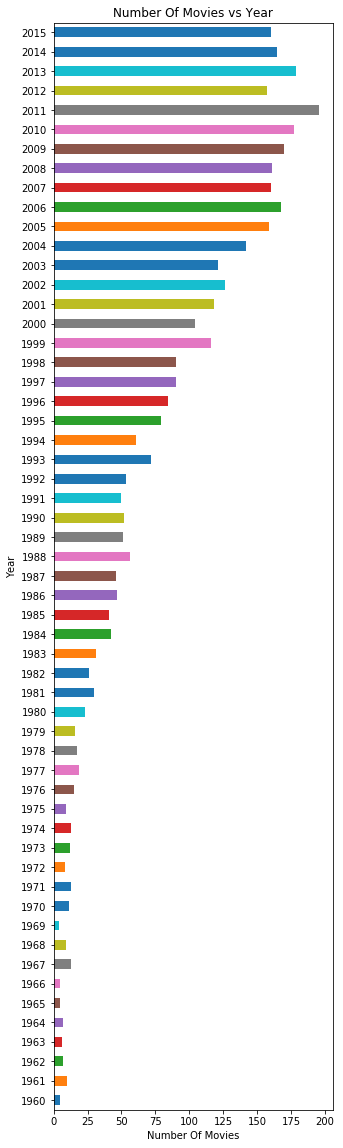

In [255]:
# count the number of movies in each year then sort the result
count_movies_year = df["release_year"].value_counts().sort_index()

# plot relationship between release_year and number of movies
count_movies_year.plot(kind='barh',title='Number Of Movies vs Year', figsize=(5,20))
# x-axis name
plt.xlabel('Number Of Movies')
# y-axis name
plt.ylabel('Year')

### Conclusion 

The number of movies **increase** over years.<br>
<br>
**Which year released highest number of movies ?** <br> From the plot in 2011 over 175 movies has been released.

### Research Question 4

#### How long is the average movie?

We can find the average runtime of movies by calculate the mean.

In [256]:
df["runtime"].describe()

count    3807.000000
mean      109.350932
std        19.845761
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Now we want visualize the resuls.

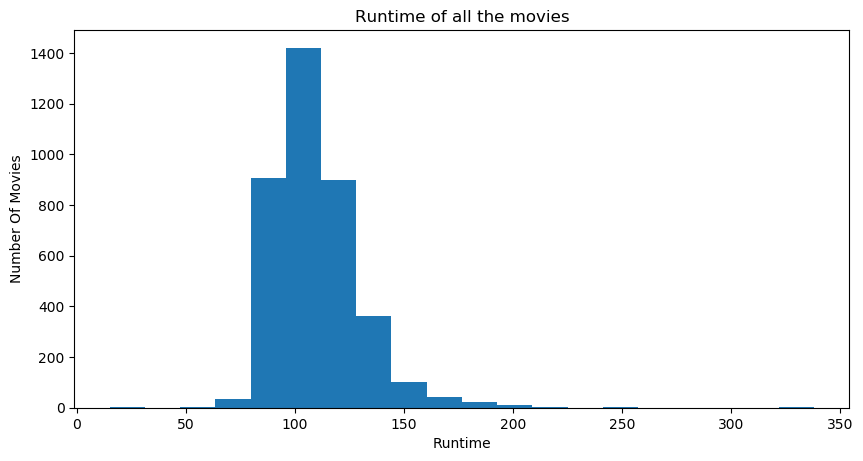

In [257]:
# histrogram for runtime and the number of movies

# figure size
plt.figure(figsize=(10,5), dpi = 100)

# x-axis name
plt.xlabel('Runtime')
# y-axis name 
plt.ylabel('Number Of Movies')
# histogram name
plt.title('Runtime of all the movies')

# plot relationship between runtime and number of movies
plt.hist(df['runtime'], bins =20);

From the histogrsm the distribution is right skewed, and it seems there is outliers in the data.

### Conclusion 

The average runtime is **109 min**.<br>
- 25% of movies have runtime less than **96 min**
- 50% of movies have runtime less than **106 min**
- 75% of movies have runtime less than **119 min**
- max, min runtime is **338 min ,15 min**


### Research Question 5

#### Which genre has the highest number of movies ?

First we need to define a function to separate genres then calculate the number of movies in each genre.

In [258]:
# Definding a function to separate the data in genres column and count the number of movies in each gener 
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

Now we want visualize the result to make conclusion.

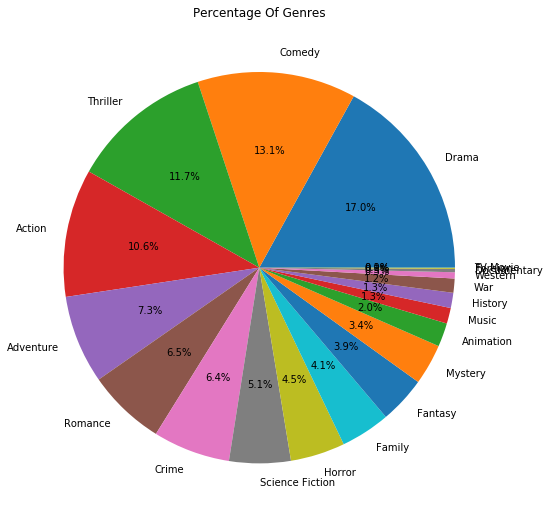

In [259]:
# Plot pie relationship between genre and number of movies
separate_count("genres").plot(kind="pie",figsize=(9,9),autopct="%1.1f%%")
# the title of the plot
plt.title('Percentage Of Genres')
plt.ylabel('');

### Conclusion 
The genre who has the highest number of movies is **Drama** by **17%**.<br>
Next after drama is **comdey** by **13.1%**

### Research Question 6

#### Does a bigger film production budget result in more profit and popularity?

we will visualize two columns by scatter plot for the **budget** and **popularity** to make conclusion.

Text(0.5, 1.0, 'Budget VS Popularity')

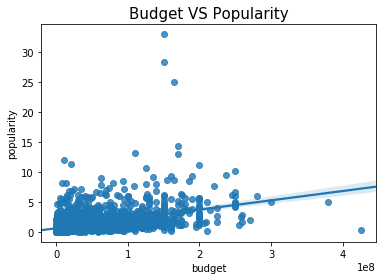

In [260]:
# Plot scatter plot for two columns
sns.regplot(x=df["budget"],y=df["popularity"]).set_title("Budget VS Popularity",size=15)


we will visualize two columns by scatter plot for the **budget** and **profit** to make conclusion.

Text(0.5, 1.0, 'Budget VS Profit')

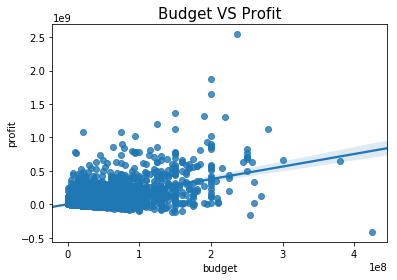

In [261]:
# Plot scatter plot for two columns
sns.regplot(x=df["budget"],y=df["profit"]).set_title("Budget VS Profit",size=15)


### Conclusion 
The two scatter plot are both positive correlation. its mean :<br>
- Most expensive movies ,Most profitable movies.
- Most Expensive Movies, Most popularity Movies.

<a id='conclusions'></a>
## Final Conclusions
 
- From rating the movies are getting worse over time.
- The film industry is a profit industry over time.
- the number of movies are increasing over years.
- The average runtime is 109 min.
- The most frequent genre is Drama.
- The more budget the movie have, More popular and profit will get.

## Limitations: 
- Missing values in the data effect the results.
- budget and revenue have alot of zeros values and had to delete alot of rows.
- Outliers in runtime, and decide what the best way to deal whith them.
- budget and revenue do not have currency unit.
- Duplicates in the data and will effect the results.
- inccorect datatype.